# Assignment 3

# This assignment is due on April 19, 23:59pm.  You should submit your solution on Canvas as a pdf file.

## Question 1 (5 marks)

Consider a classification tree with $D$ terminal nodes denoted $R_d$, $d=1,\dots, D$.  We have training data $(y_i,x_i)$, $i=1,\dots, n$, where $y_i\in \{1,\dots, K\}$ are class labels, and $x_i\in\mathbb{R}^p$ are feature vectors.  We suppose that there are $n_d$ training feature vectors in $R_d$, and that $n_{dj}$ of these have class label $j$.  

Recall that a multinomial distribution describes the distribution of counts of events of $K$ different types in $m$ independent trials with the $j$th event type having probability $p_j$, $j=1,\dots, K$, $\sum_{j=1}^K p_j=1$.  The multinomial probability function gives the probability of $x_j$ events of type $j$, $j=1,\dots, K$, in $m$ independent trials as $$\frac{m!}{\prod_{j=1}^K x_j!}\prod_{j=1}^K p_j^{x_j},$$ where $x_j$ are integers, $x_j\geq 0$, $\sum_{j=1}^K x_j=m$.

(a) Suppose that in the regression tree the probability of an observation having class $j$ in terminal node $R_d$ is denoted $p_{dj}$.  Write $p_d=(p_{d1},\dots, p_{dK})^\top$ and $p=(p_1^\top,\dots, p_D^\top)^\top$.  So $p_d$ is the set of class probabilities for region $R_d$ as a column vector, and $p$ is the set of all the probabilities as a column vector.  Show that the log-likelihood function $\ell(p)$ for the observed data is $$\ell(p)=\sum_{d=1}^D \sum_{j=1}^K n_{dj}\log p_{dj},$$
apart from an additive constant that does not depend on $p$.  

(b) It is easily shown that the maximum likelihood estimate of $p_{dj}$ is $\hat{p}_{dj}=n_{dj}/n_d$ (you are not required to prove this).  Write $\hat{p}_d=(\hat{p}_{d1},\dots,\hat{p}_{dK})^\top$, and $\hat{p}=(\hat{p}_1^\top,\dots, \hat{p}_D^\top)^\top$.  Show that the negative log-likelihood at $\hat{p}$ is $$-\sum_{d=1}^D n_d \sum_{j=1}^K \hat{p}_{dj}\log \hat{p}_{dj},$$ (apart from an additive constant independent of $p$) which is the weighted sum of entropy node impurity at the terminal nodes, weighting by the number of observations at the nodes.  This is an analogous quantity to the residual sum of squares for regression trees, and one of the criteria we used when growing and pruning classification trees.

## Question 2 (5 marks)

In our discussion of the support vector machine, one of the kernels we used in examples was the radial kernel:  $$K(x,z)=\exp(-\gamma \|x-z\|^2).$$ We mentioned in class that any valid kernel could be written in the form $$K(x,z) = \sum_{i=1}^\infty \phi_i(x)\phi_i(z),$$ where we could regard $\phi(x)=(\phi_1(x),\phi_2(x),\dots )$ as an extended feature vector, with the kernel $K(x,z)$ computing an inner product for the extended features.  For simple notation suppose that the feature vector is one-dimesional, and writing $$\exp(-\gamma(x-z)^2)=\exp(-\gamma x^2)\exp(-\gamma z^2)\exp(2\gamma xz),$$ and expanding the last term using the power series representation $\exp(w)=\sum_{i=0}^\infty \frac{w^i}{i!}$, find an explicit feature map $\phi(x)$ for which $K(x,z)=\sum_{i=1}^\infty \phi_i(x)\phi_i(z)$ for the radial kernel.    

## Question 3 (5 marks)

The following question describes one way to perform a principal components analysis (PCA) when the number of observations $n$ is much less than $p$.  As you know, in this case there are only $\min\{n-1,p\}=n-1$ principal components.  Suppose that $X$ is the data matrix (of size $n\times p$) and that the columns of $X$ are centred to have mean zero.  Then the sample covariance matrix is $n^{-1}X^\top X$ (using a denominator of $n$).  

(a) By considering the eigenvector equation for $S$, $$S\phi_i=n^{-1}X^\top X\phi_i=\lambda_i \phi_i,$$ and multiplying both sides by $X$, deduce that the non-zero eigenvalues of $n^{-1}XX^\top$ are the same as those of $S=n^{-1}X^\top X$.  The reason this is important is that if $n$ is much smaller than $p$, it is easier to work with the $n\times n$ matrix $n^{-1}XX^\top$ rather than the $p\times p$ matrix $S$. 

(b) Let $\phi_i'$ be an eigenvector of $n^{-1}XX^\top$, i.e. $$n^{-1}XX^\top \phi_i'=\lambda_i\phi_i'.$$  Multiply both sides of this equation by $X^\top$ and deduce that $X^\top \phi_i'$ satisfies the eigenvector equation for $S$.  

(c) Show that to obtain an eigenvector by rescaling the vector $X^\top \phi_i'$ obtained in part (b) so that it has length one, we should use $(n\lambda_i)^{-1/2}X^\top \phi_i'$.  

## Question 4 (5 marks)

This is question 7 in Section 12.6 of your textbook, page 556.  

From the textbook website there is a csv file ``Ch12Ex13.csv`` that I have put on the Canvas files in the ``Assignments``folder.  The dataset consists of measurements of gene expression for $1,000$ genes on $40$ tissue samples.  The first $20$ samples are from healthy patients, while the second $20$ are from a diseased group.  

(a) Load in the data using ``pd.read_csv()``.  You will need to select ``header=None``.  

(b) Apply hierarchical clustering to the samples using correlation-based distance, and plot the dendrogram.  Do the genes separate the samples into two groups?  Do your results depend on the type of linkage used?

(c) Your collaborator wants to know which genes differ the most across the two groups.  Suggest a way to answer this question, and apply it here.  

 ### Answer:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from ISLP.cluster import compute_linkage

In [2]:
data = pd.read_csv('Ch12Ex13.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216725,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.075148,3.003267,-0.123441,-1.036740,-1.270604,-1.277029,-0.278504,1.249723,-0.706994,-0.704671,...,0.842161,-0.762154,0.546881,1.586981,-0.242043,0.507189,1.297424,0.314290,-1.513097,-0.074709
996,-1.226125,-0.501702,-0.717430,-0.169113,0.599530,-0.997987,0.028236,0.200508,-1.364865,0.564957,...,-1.012523,0.593252,-0.594506,-1.443559,-0.028870,0.052170,-0.867227,0.228531,-0.207759,-0.209665
997,-3.056328,0.449889,1.880362,-0.742841,2.238346,-0.291738,1.270233,0.696415,1.242857,0.429148,...,0.135085,-0.732077,-0.037468,-0.836689,0.020274,-0.803306,-0.907277,-0.781791,0.069908,1.336894
998,1.450658,1.310348,0.383837,-0.408860,-0.471111,-1.392396,-0.805808,0.210900,1.727079,0.862870,...,0.109018,-0.128522,0.860270,0.765015,-2.360090,0.252699,-1.461818,-0.812342,-1.095099,-1.460114


In [3]:
new_row = pd.Series( [0]*20 + [1]*20 , index=data.columns, name='actual classification')
data = data.append(new_row, ignore_index=False) 

/var/folders/b2/lk212mrd3wg5f9tyt_p3j4h80000gn/T/ipykernel_17430/1018222301.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row, ignore_index=False)


In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216725,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,-1.226125,-0.501702,-0.717430,-0.169113,0.599530,-0.997987,0.028236,0.200508,-1.364865,0.564957,...,-1.012523,0.593252,-0.594506,-1.443559,-0.028870,0.052170,-0.867227,0.228531,-0.207759,-0.209665
997,-3.056328,0.449889,1.880362,-0.742841,2.238346,-0.291738,1.270233,0.696415,1.242857,0.429148,...,0.135085,-0.732077,-0.037468,-0.836689,0.020274,-0.803306,-0.907277,-0.781791,0.069908,1.336894
998,1.450658,1.310348,0.383837,-0.408860,-0.471111,-1.392396,-0.805808,0.210900,1.727079,0.862870,...,0.109018,-0.128522,0.860270,0.765015,-2.360090,0.252699,-1.461818,-0.812342,-1.095099,-1.460114
999,0.717977,0.763482,0.313576,-0.326473,-0.158700,0.468113,0.519161,-0.427099,2.759068,-2.571514,...,-1.105732,-0.876950,-0.298792,-0.576146,-1.196780,0.409031,-0.032282,-0.562064,-0.315811,0.192863


In [5]:
HClust = AgglomerativeClustering

In [6]:
distance_matrix = 1 - np.corrcoef(data.T)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

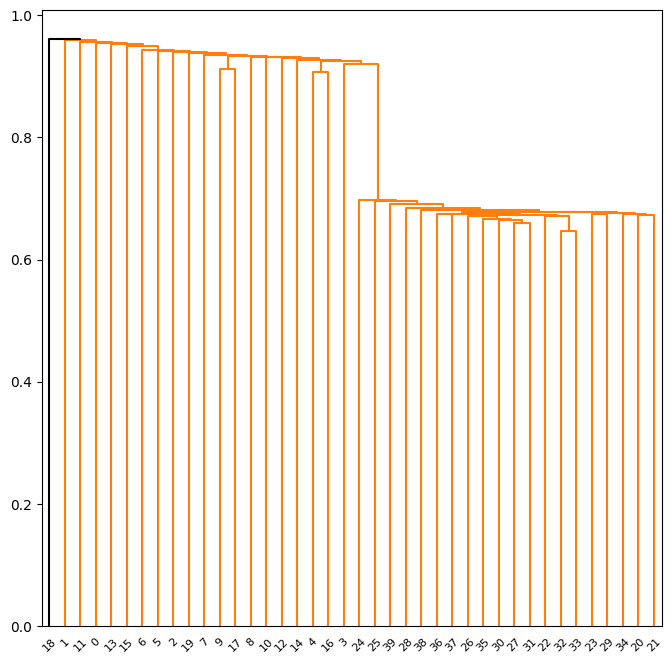

In [7]:
hc_sing_pre = HClust(distance_threshold=0,
                     n_clusters=None,
                     metric='precomputed',
                     linkage='single')
hc_sing_pre.fit(distance_matrix)
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_sing_pre)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           color_threshold = 0.96,
           above_threshold_color='black');
cut_tree(linkage_comp, n_clusters = 2).T

[[0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1]]


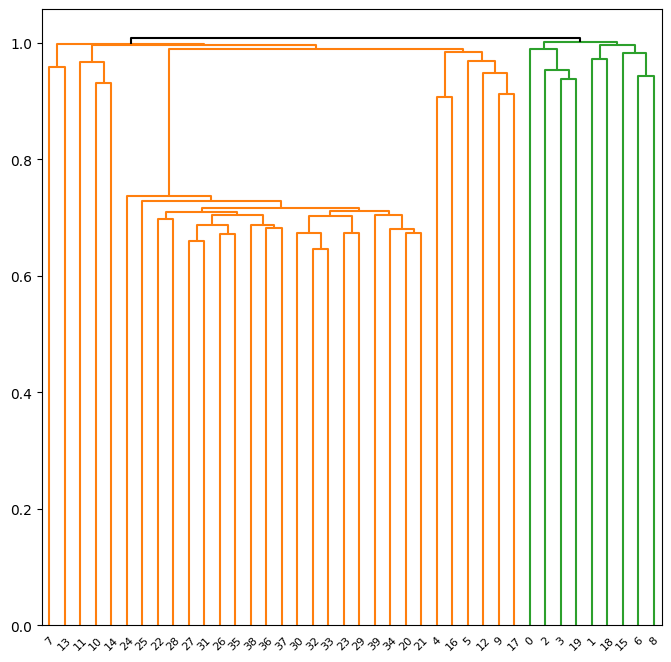

In [8]:
hc_avg_pre = HClust(distance_threshold=0,
                    n_clusters=None,
                    linkage='average',
                    metric='precomputed',)
hc_avg_pre.fit(distance_matrix)
linkage_avg = compute_linkage(hc_avg_pre)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_avg,
           ax=ax,
           color_threshold = 1.005,
           above_threshold_color='black');
cluster_assignments = cut_tree(linkage_avg, n_clusters = 2).T
print(cluster_assignments)

array([[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

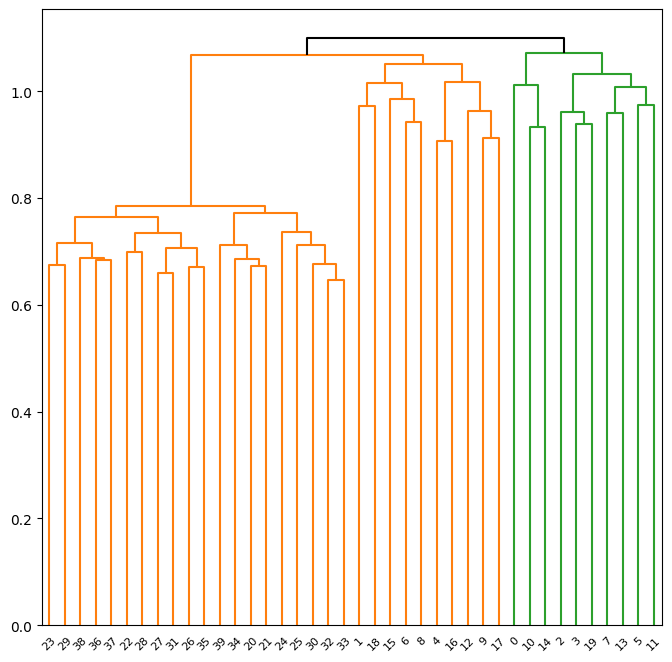

In [9]:
hc_comp_pre = HClust(distance_threshold=0,
                     n_clusters=None,
                     metric='precomputed',
                     linkage='complete')
hc_comp_pre.fit(distance_matrix)
cargs = {'color_threshold':-np.inf,
         'above_threshold_color':'black'}
linkage_comp = compute_linkage(hc_comp_pre)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           color_threshold = 1.09,
           above_threshold_color='black');
cut_tree(linkage_comp, n_clusters = 2).T

In [10]:
linkage_comp = compute_linkage(hc_comp_pre)
comp_cut = cut_tree(linkage_comp, n_clusters=2).reshape(-1)
data.append(pd.Series(comp_cut.reshape(-1), name='classification'))

/var/folders/b2/lk212mrd3wg5f9tyt_p3j4h80000gn/T/ipykernel_17430/48177169.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data.append(pd.Series(comp_cut.reshape(-1), name='classification'))


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216725,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,-3.056328,0.449889,1.880362,-0.742841,2.238346,-0.291738,1.270233,0.696415,1.242857,0.429148,...,0.135085,-0.732077,-0.037468,-0.836689,0.020274,-0.803306,-0.907277,-0.781791,0.069908,1.336894
998,1.450658,1.310348,0.383837,-0.408860,-0.471111,-1.392396,-0.805808,0.210900,1.727079,0.862870,...,0.109018,-0.128522,0.860270,0.765015,-2.360090,0.252699,-1.461818,-0.812342,-1.095099,-1.460114
999,0.717977,0.763482,0.313576,-0.326473,-0.158700,0.468113,0.519161,-0.427099,2.759068,-2.571514,...,-1.105732,-0.876950,-0.298792,-0.576146,-1.196780,0.409031,-0.032282,-0.562064,-0.315811,0.192863
actual classification,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
pd.crosstab(data.T['actual classification'],
            pd.Series(comp_cut.reshape(-1), name='Complete'))

Complete,0,1
actual classification,,
0.0,10,10
1.0,0,20


In [12]:
linkage_avg = compute_linkage(hc_avg_pre)
avg_cut = cut_tree(linkage_avg, n_clusters=2).reshape(-1)
pd.crosstab(data.T['actual classification'],
            pd.Series(avg_cut.reshape(-1), name='Average'))

Average,0,1
actual classification,,
0.0,9,11
1.0,0,20


In [17]:
linkage_sing = compute_linkage(hc_sing_pre)
sing_cut = cut_tree(linkage_sing, n_clusters=2).reshape(-1)
pd.crosstab(data.T['actual classification'],
            pd.Series(sing_cut.reshape(-1), name='Single'))

Single,0,1
actual classification,,
0.0,19,1
1.0,20,0


In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from statsmodels.stats.multitest import multipletests
import scipy.stats as stats
import matplotlib.pyplot as plt

(a) Load in the data using ``pd.read_csv()``.  You will need to select ``header=None``.  

In [2]:
data = pd.read_csv('Ch12Ex13.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216725,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.075148,3.003267,-0.123441,-1.036740,-1.270604,-1.277029,-0.278504,1.249723,-0.706994,-0.704671,...,0.842161,-0.762154,0.546881,1.586981,-0.242043,0.507189,1.297424,0.314290,-1.513097,-0.074709
996,-1.226125,-0.501702,-0.717430,-0.169113,0.599530,-0.997987,0.028236,0.200508,-1.364865,0.564957,...,-1.012523,0.593252,-0.594506,-1.443559,-0.028870,0.052170,-0.867227,0.228531,-0.207759,-0.209665
997,-3.056328,0.449889,1.880362,-0.742841,2.238346,-0.291738,1.270233,0.696415,1.242857,0.429148,...,0.135085,-0.732077,-0.037468,-0.836689,0.020274,-0.803306,-0.907277,-0.781791,0.069908,1.336894
998,1.450658,1.310348,0.383837,-0.408860,-0.471111,-1.392396,-0.805808,0.210900,1.727079,0.862870,...,0.109018,-0.128522,0.860270,0.765015,-2.360090,0.252699,-1.461818,-0.812342,-1.095099,-1.460114


(b) Apply hierarchical clustering to the samples using correlation-based distance, and plot the dendrogram.  Do the genes separate the samples into two groups?  Do your results depend on the type of linkage used?

/var/folders/b2/lk212mrd3wg5f9tyt_p3j4h80000gn/T/ipykernel_24361/2754153963.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = linkage(correlation_distance, method=linkage_type)
/var/folders/b2/lk212mrd3wg5f9tyt_p3j4h80000gn/T/ipykernel_24361/2754153963.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = linkage(correlation_distance, method=linkage_type)
/var/folders/b2/lk212mrd3wg5f9tyt_p3j4h80000gn/T/ipykernel_24361/2754153963.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = linkage(correlation_distance, method=linkage_type)
/var/folders/b2/lk212mrd3wg5f9tyt_p3j4h80000gn/T/ipykernel_24361/2754153963.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed 

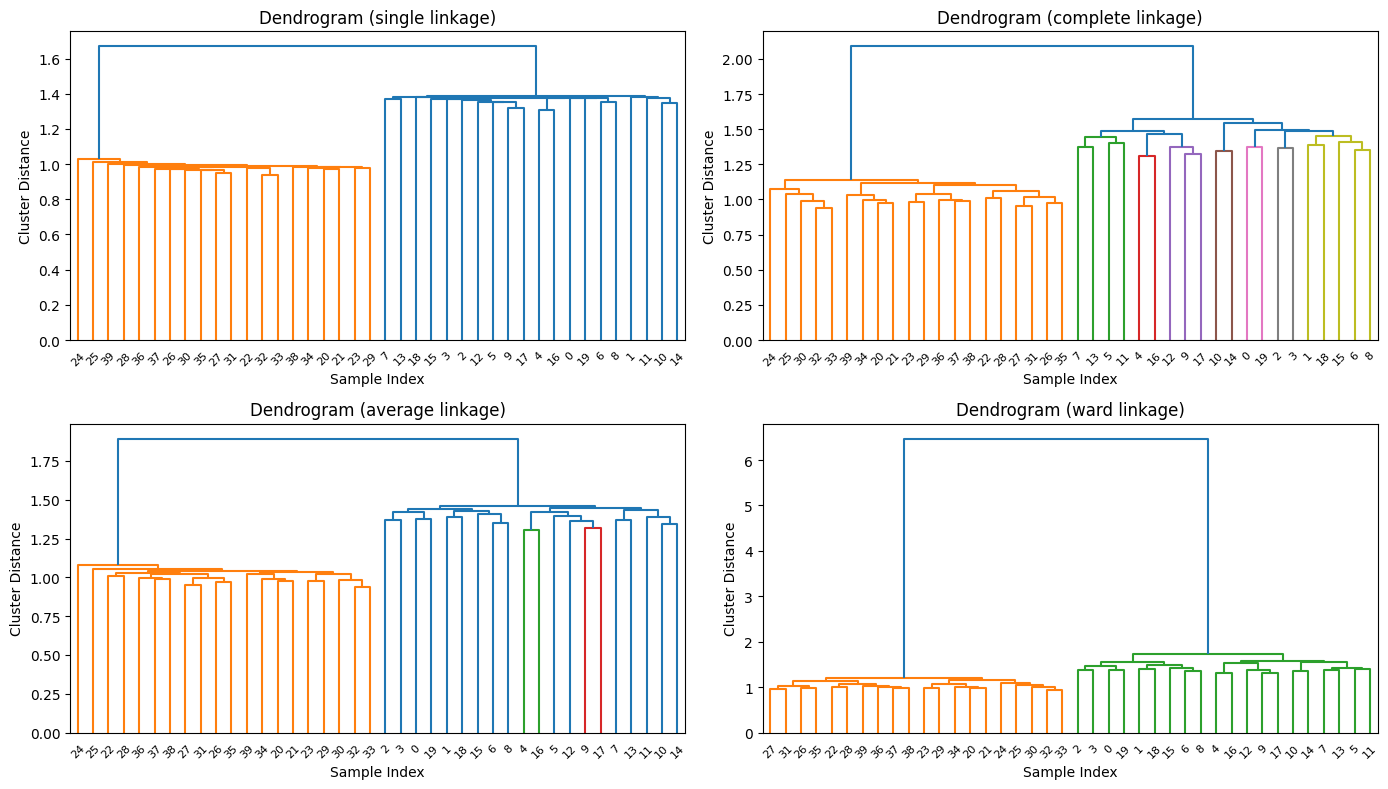

In [3]:
correlation_distance = squareform(pdist(data.T, metric='correlation'))
linkage_types = ['single', 'complete', 'average', 'ward']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

for ax, linkage_type in zip(axes.flatten(), linkage_types):
    clusters = linkage(correlation_distance, method=linkage_type)
    dendrogram(clusters, labels=None, ax=ax)
    ax.set_title(f'Dendrogram ({linkage_type} linkage)')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Cluster Distance')

plt.tight_layout()
plt.savefig('hierarchical_clustering_dendrograms.png')
plt.show()

(c) Your collaborator wants to know which genes differ the most across the two groups.  Suggest a way to answer this question, and apply it here.  

In [4]:
correlation_distance = 1 - data.T.corr()
linkage_matrix = linkage(correlation_distance, method='average')
cluster_assignments = fcluster(clusters, t=1.75, criterion='distance')
group1 = data.loc[:, cluster_assignments == 1]
group2 = data.loc[:, cluster_assignments == 2]

/var/folders/b2/lk212mrd3wg5f9tyt_p3j4h80000gn/T/ipykernel_24361/2077919395.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(correlation_distance, method='average')


In [5]:
group2.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')

In [6]:
group1.columns

Int64Index([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
            37, 38, 39],
           dtype='int64')

In [7]:
p_values = []
for i in range(data.shape[0]):
    t_stat, p_val = stats.ttest_ind(group1.iloc[i, :], group2.iloc[i, :], equal_var=False)
    p_values.append(p_val)
_, adjusted_p_values, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')
results = pd.DataFrame({'Gene Index': range(data.shape[0]), 'Adjusted P-Value': adjusted_p_values})
results['Adjusted P-Value'] = results['Adjusted P-Value'].apply(lambda x: x)
results_sorted = results.sort_values(by='Adjusted P-Value')
print("Top 10 genes differing the most across the derived two groups:")
print(results_sorted.head(10))

Top 10 genes differing the most across the derived two groups:
     Gene Index  Adjusted P-Value
501         501      1.530472e-09
588         588      3.255932e-09
599         599      3.345330e-09
589         589      2.808639e-08
564         564      3.531728e-08
592         592      1.928742e-07
550         550      1.928742e-07
583         583      2.665763e-07
568         568      2.830488e-07
537         537      2.830488e-07
